**Importing Python Libraries**

In [1]:
import numpy as np
from scipy import signal
import pandas as pd
import matplotlib.pyplot as plt
import random as rn
import math

**Data Importing**

In [3]:
df = pd.read_csv('DST0.csv')
df.head()

,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),A,SOC,SOC%
0,0.000000,4.154059,0.000000e+00,0.0,0.0,1.0,100.0
1,0.999353,4.247043,7.054610e-10,0.0,0.0,1.0,100.0
2,0.339846,4.199741,9.933060e-04,0.0,0.0,1.0,100.0
3,0.317353,4.199903,1.905517e-03,0.0,0.0,1.0,100.0
4,0.300798,4.199903,2.764220e-03,0.0,0.0,1.0,100.0


In [4]:
X =df.drop(['Charge_Capacity(Ah)','Discharge_Capacity(Ah)', 'A', 'SOC', 'SOC%'], axis=1)
X = X.dropna()
print(X)

      Current(A)  Voltage(V)
0       0.000000    4.154059
1       0.999353    4.247043
2       0.339846    4.199741
3       0.317353    4.199903
4       0.300798    4.199903
...          ...         ...
7195   -0.000074    3.577693
7196   -0.000254    3.577855
7197   -0.000254    3.577855
7198   -0.000254    3.578179
7199   -0.000434    3.578017

[7200 rows x 2 columns]


**Moving Average Filter for Input Quantities**

In [5]:
L=7200 #L-point filter
b = (np.ones(L))/L #numerator co-effs of filter transfer function
a = 1  #denominator co-effs of filter transfer function
Xf = signal.lfilter(b,a,X) #filter output using lfilter function
print(Xf)

[[ 0.00000000e+00  5.76952696e-04]
 [ 1.38799060e-04  7.28666095e-04]
 [ 4.72008768e-05  6.30498222e-04]
 ...
 [-3.52962500e-08  4.96889058e-04]
 [-3.52962500e-08  4.96934026e-04]
 [-6.02890278e-08  4.96886549e-04]]


                 0         1
0     0.000000e+00  0.000577
1     1.387991e-04  0.000729
2     4.720088e-05  0.000630
3     4.407679e-05  0.000627
4     4.177746e-05  0.000625
...            ...       ...
7195 -1.030361e-08  0.000497
7196 -3.529625e-08  0.000497
7197 -3.529625e-08  0.000497
7198 -3.529625e-08  0.000497
7199 -6.028903e-08  0.000497

[7200 rows x 2 columns]


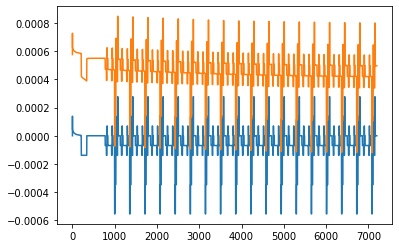

In [6]:
Xf1 = pd.DataFrame(Xf)
print(Xf1)
plt.plot(Xf1)

**Data Normalization**

             0         1
0     0.333458  0.438045
1     0.666567  0.750795
2     0.446737  0.548427
3     0.439239  0.542033
4     0.433721  0.537293
...        ...       ...
7195  0.333433  0.273003
7196  0.333373  0.272998
7197  0.333373  0.272998
7198  0.333373  0.273090
7199  0.333313  0.272993

[7200 rows x 2 columns]


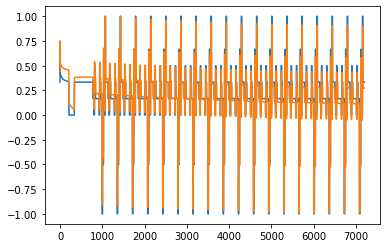

In [7]:
df_min_max_scaled = Xf1.copy()  
# apply normalization techniques
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = -1 + 2*(df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
    Xn = df_min_max_scaled.copy()
# view normalized data
print(Xn)
plt.plot(Xn)

In [8]:
Y =df.drop(['Current(A)','Voltage(V)','Charge_Capacity(Ah)','Discharge_Capacity(Ah)','A','SOC%'], axis=1)
Y = Y.dropna()
print(Y)

               SOC
0     1.000000e+00
1     1.000000e+00
2     1.000000e+00
3     1.000000e+00
4     1.000000e+00
...            ...
7195 -1.862790e-07
7196 -2.247090e-07
7197 -2.635090e-07
7198 -3.103430e-07
7199 -3.318710e-07

[7200 rows x 1 columns]


**Dataset Splitting into Training and Testing Data**

In [9]:
from sklearn.model_selection import train_test_split
train_Xn, test_Xn, train_Y, test_Y = train_test_split(Xn, Y,train_size=0.7,test_size=0.3)
print("Labels for training and testing data")
print(train_Y)
print(test_Y)
print(train_Xn)
print(test_Xn)

Labels for training and testing data
           SOC
4288  0.336052
38    1.000000
3382  0.453399
4166  0.362670
1661  0.656681
...        ...
4826  0.284270
5197  0.241029
1106  0.714072
3993  0.378046
1797  0.630060

[5040 rows x 1 columns]
           SOC
4373  0.334142
1375  0.682868
2645  0.539395
569   0.756065
6175  0.122542
...        ...
535   0.756065
3248  0.462053
3081  0.489071
4524  0.320669
1589  0.663780

[2160 rows x 1 columns]
             0         1
4288  0.999940  0.917118
38    0.381718  0.492624
3382  0.166567  0.156710
4166  0.333373  0.301939
1661  0.333373  0.355369
...        ...       ...
4826  0.166627  0.133525
5197  0.166627  0.129212
1106  0.333373  0.369562
3993  0.333373  0.305881
1797  0.333433  0.348371

[5040 rows x 2 columns]
             0         1
4373  0.166627  0.141039
1375 -0.499880 -0.446910
2645  0.166627  0.172485
569   0.333458  0.384337
6175  0.000060 -0.036821
...        ...       ...
535   0.333458  0.384244
3248  0.333373  0.317337
308

**Sigmoid Function**

In [10]:
# defining the Sigmoid Function
def sigmoid (Xn):
    return 1/(1 + np.exp(-Xn))

# derivative of Sigmoid Function
def derivatives_sigmoid(Xn):
    return Xn * (1 - Xn)

**Initialization of Parameters**

In [11]:
#Weights
w0 = 2*np.random.random((2, 1)) - 1 #for input   - 2 inputs, 1 outputs
w1 = 2*np.random.random((1, 1)) - 1 #for layer 1 - 2 inputs, 1 outputs
#learning rate
n = 0.1
epoch = 500
hiddenlayer_neurons = 10
hiddenlayer = 1

In [12]:
errors = []

**Feed-Forward Backpropagation**

In [13]:
for i in range (epoch):

    #Feed forward network
    layer0 = train_Xn
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    #Back propagation using gradient descent
    layer2_error = train_Y - layer2
    layer2_delta = layer2_error * derivatives_sigmoid(layer2)
    layer1_error = layer2_delta.dot (w1.T)
    layer1_delta = layer1_error * derivatives_sigmoid(layer1)
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    error = np.mean(np.abs(layer2_error))
    errors.append(error)

**Calculation of Accuracy of Training Model**

In [14]:
accuracy_training = (1 - error) * 100

In [15]:
print ("Training Accuracy of the model   " + str (round(accuracy_training,2)) + "%")

Training Accuracy of the model   SOC    82.39
dtype: float64%


**SOC Graph**

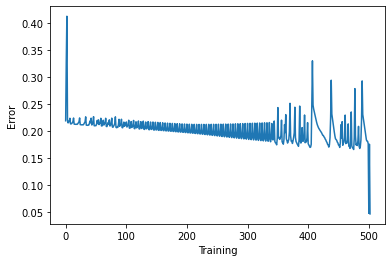

In [31]:
plt.plot(errors)
plt.xlabel('Training')
plt.ylabel('Error')
plt.show()

**Mean Square Error Calculation**

In [17]:
MSE = np.mean((train_Y - layer2)**2) # Mean Squared Error
print(MSE)
errors.append(MSE)

SOC    0.046909
dtype: float64


In [18]:
from sklearn.metrics import mean_squared_error
mean_squared_error(train_Y,layer2)

0.046909225087493484

**Absolute Error Calculation**

In [19]:
print(error) # Absolute Error Value

SOC    0.176105
dtype: float64


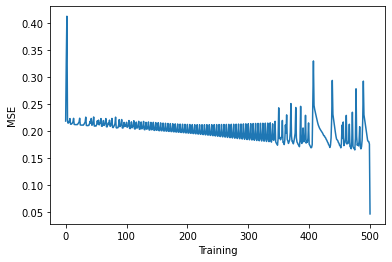

In [20]:
plt.plot(errors)
plt.xlabel('Training')
plt.ylabel('MSE')# SOC 
plt.show()

**Linear Regression**

In [29]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(train_Y,layer2)
layer2n = linear_regressor.predict(train_Y)

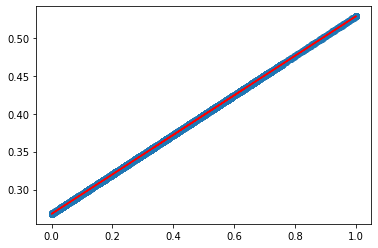

In [30]:
plt.scatter(train_Y,layer2n)
plt.plot(train_Y, layer2n, color='red')
plt.show()

**Testing Part**

In [21]:
#Testing
layer0 = test_Xn
layer1 = sigmoid(np.dot(layer0, w0))
layer2t = sigmoid(np.dot(layer1, w1))
layer2_error = test_Y - layer2t
error = np.mean(np.abs(layer2_error))
errors.append(error)

**Testing Accuracy Calculation**

In [22]:
accuracy_testing = (1 - error) * 100

In [23]:
print ("Testing Accuracy of the model   " + str (round(accuracy_testing,2)) + "%")

Testing Accuracy of the model   SOC    82.47
dtype: float64%


**SOC error Graph**

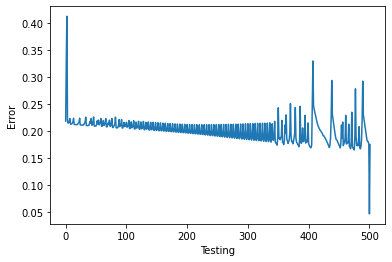

In [24]:
plt.plot(errors)
plt.xlabel('Testing')
plt.ylabel('Error')
plt.show()

**Mean Square Error**

In [25]:
MSE_T = np.mean((test_Y - layer2t)**2) # Mean Squared Error
print(MSE_T)
errors.append(MSE_T)

SOC    0.045835
dtype: float64


In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_Y,layer2t)

0.04583503805425129

**Mean Absolute Error**

In [27]:
print(error) # Absolute Error Value

SOC    0.175336
dtype: float64


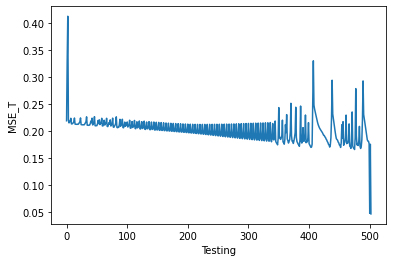

In [28]:
plt.plot(errors)
plt.xlabel('Testing')
plt.ylabel('MSE_T')# SOC 
plt.show()